In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [24]:

# Load the data from CSV file
df = pd.read_csv('data.csv')


In [25]:

# Display the first 5 rows to inspect data
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   participant_id gender  age  sleep_hours stress_level  physical_activity  \
0               1      M   25            7          Low               5000   
1               2      F   26            6         High               7000   
2               3      M   27            8       Medium               3000   
3               4      F   28            5          Low               8000   
4               5      M   29            7         High               4000   

   heart_rate  bmi  sleep_quality  
0          60   22              4  
1          75   28              2  
2          70   24              5  
3          65   30              3  
4          80   26              4  


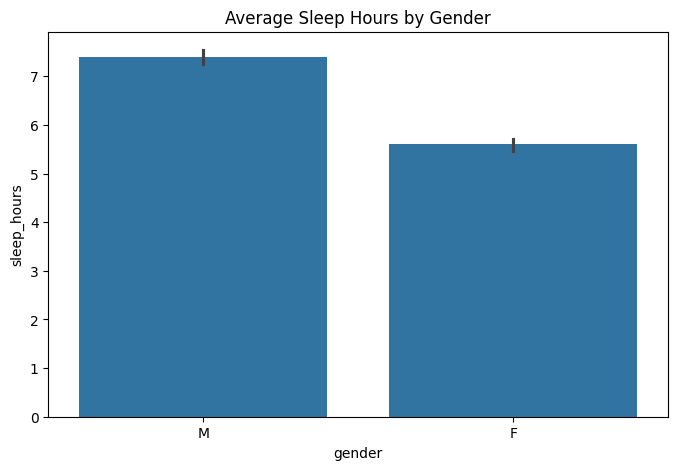

In [26]:

# Plot 1: Average sleep duration by gender
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='sleep_hours', data=df)
plt.title('Average Sleep Hours by Gender')
plt.show()


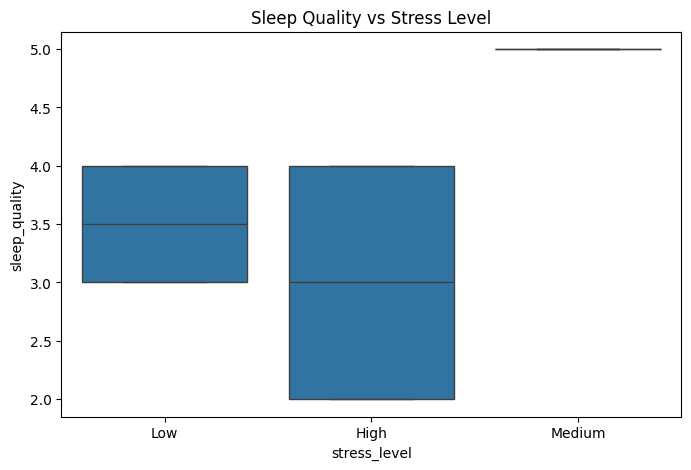

In [27]:

# Plot 2: Sleep quality depending on stress level
plt.figure(figsize=(8,5))
sns.boxplot(x='stress_level', y='sleep_quality', data=df)
plt.title('Sleep Quality vs Stress Level')
plt.show()


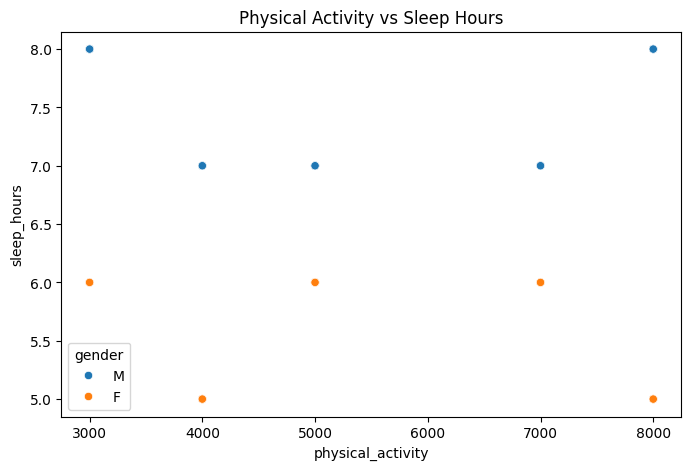

In [28]:

# Plot 3: Physical activity vs sleep duration colored by gender
plt.figure(figsize=(8,5))
sns.scatterplot(x='physical_activity', y='sleep_hours', hue='gender', data=df)
plt.title('Physical Activity vs Sleep Hours')
plt.show()


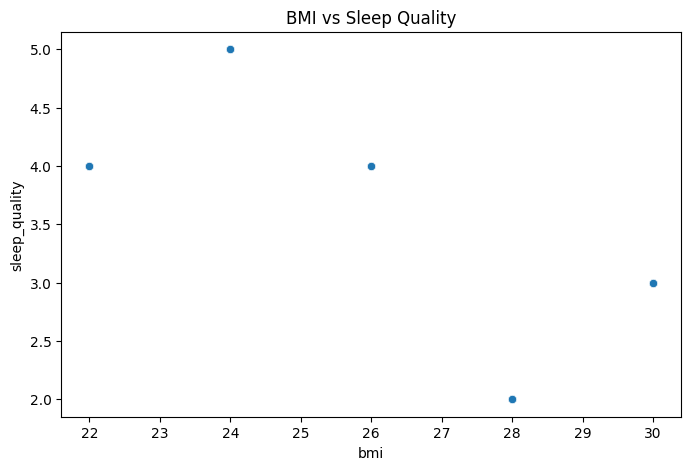

In [29]:

# Plot 4: BMI vs sleep quality
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='sleep_quality', data=df)
plt.title('BMI vs Sleep Quality')
plt.show()


In [30]:

# Map 'stress_level' from categorical to numeric values for correlation
stress_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['stress_level_num'] = df['stress_level'].map(stress_map)


In [31]:

# Create age groups for boxplot
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100],
                         labels=['0-18', '19-35', '36-50', '51-65', '65+'])


C:\Users\0911d\AppData\Local\Temp\ipykernel_6728\3020389295.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




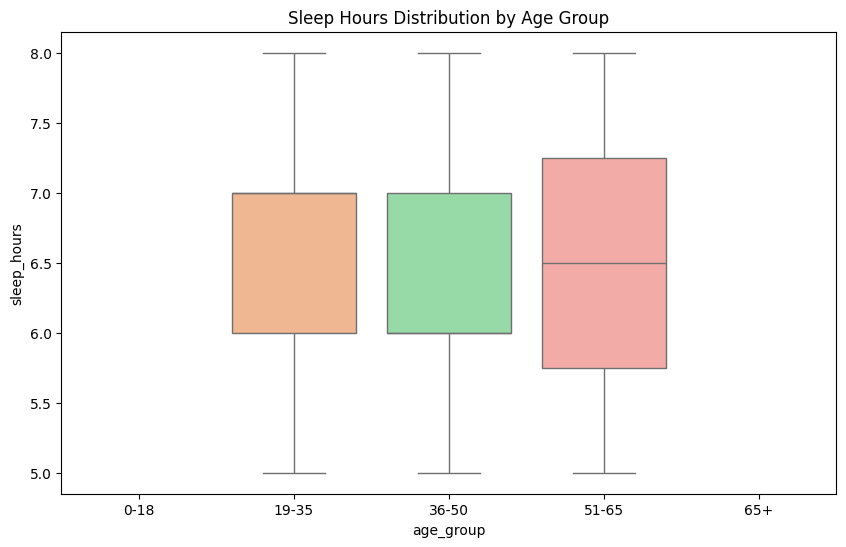

In [32]:

# Plot 5: Sleep Hours Distribution by Age Group
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='sleep_hours', data=df, palette='pastel')
plt.title('Sleep Hours Distribution by Age Group')
plt.show()


In [33]:

# Correlation heatmap using numeric columns including mapped stress_level_num
numeric_cols = ['sleep_hours', 'sleep_quality', 'stress_level_num', 'physical_activity', 'bmi', 'age']
corr = df[numeric_cols].corr()


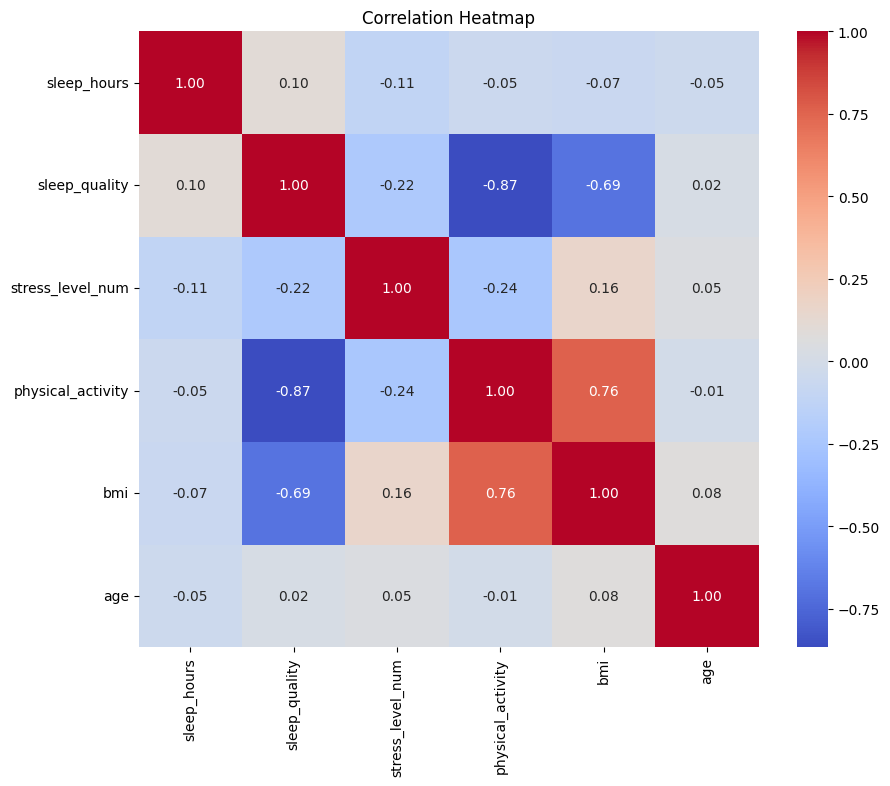

In [34]:

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [35]:

# --- Plotly Interactive Visualizations ---

# Bar plot: Average Sleep Hours by Gender (interactive)
fig1 = px.bar(df.groupby('gender', as_index=False)['sleep_hours'].mean(),
              x='gender', y='sleep_hours',
              title='Average Sleep Hours by Gender (Interactive)',
              labels={'sleep_hours': 'Average Sleep Hours'})
fig1.show()


In [36]:

# Box plot: Sleep Quality vs Stress Level (interactive)
fig2 = px.box(df, x='stress_level', y='sleep_quality',
              title='Sleep Quality vs Stress Level (Interactive)')
fig2.show()


In [37]:

# Scatter plot: Physical Activity vs Sleep Hours, colored by gender (interactive)
fig3 = px.scatter(df, x='physical_activity', y='sleep_hours', color='gender',
                  title='Physical Activity vs Sleep Hours (Interactive)',
                  labels={'physical_activity': 'Physical Activity', 'sleep_hours': 'Sleep Hours'})
fig3.show()


In [38]:

# Scatter plot: BMI vs Sleep Quality (interactive)
fig4 = px.scatter(df, x='bmi', y='sleep_quality',
                  title='BMI vs Sleep Quality (Interactive)',
                  labels={'bmi': 'BMI', 'sleep_quality': 'Sleep Quality'})
fig4.show()


In [39]:

# Box plot: Sleep Hours by Age Group (interactive)
fig5 = px.box(df, x='age_group', y='sleep_hours',
              title='Sleep Hours Distribution by Age Group (Interactive)')
fig5.show()


In [40]:

# Correlation heatmap with Plotly (interactive)
import numpy as np
corr_matrix = corr.round(2)

fig6 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Viridis',
    text=corr_matrix.values,
    texttemplate="%{text}",
    colorbar=dict(title='Correlation Coefficient')
))
fig6.update_layout(title='Correlation Heatmap (Interactive)')
fig6.show()
